#DESAFIO#

O Sr. João tem uma rede de quatro lojas, que pertencem ao e-commerce Alura Store. Ele quer vender uma dessas lojas para ter um capital e investir em um novo negócio. Como Analista de Dados, vou analisar qual dessas lojas tem o menor desempenho comparado às outras e, baseado na análise, fazer um relatório e mostrar para Sr.João qual loja ele deve vender.

As seguintes métricas farão parte dessa análise:

1. faturamento total de cada loja,
2. categorias mais populares,
3. média de avaliação dos clientes,
4. produtos mais e menos vendidos e
5. custo médio do frete.

### Importação dos dados



In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [ ]:
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


##De acordo com as instruções no Trello o faturamento é para se considerar somente o Preço e não o Frete.##

Inicialmente para que eu possa fazer referência correta aos campos das colunas das tabelas de dados utilizei-me do comando:
```
print(loja1.columns)
```

In [ ]:
print(loja1.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


1. Identificado os campos recorri a função .sum() da biblioteca pandas para obter a somatória da coluna 'Preço" e obter o faturamento de cada loja.
2. Como na base de dados os valores estão em formato americano, com "." ponto para os decimais, formatei a saída para o formato em moeda R$

In [ ]:
faturamento1 = loja1['Preço'].sum()
faturamento2 = loja2['Preço'].sum()
faturamento3 = loja3['Preço'].sum()
faturamento4 = loja4['Preço'].sum()

valor_formatado = format(faturamento1, ',.2f')
valor_formatado = valor_formatado.replace(',', 'X').replace('.', ',').replace('X', '.')
print(f'\nFaturamento da loja 1: R$ {valor_formatado}')



Faturamento da loja 1: R$ 1.534.509,12


Uma vez verificado a somatória e o formato de saída em R$ criei um **dicionário {chave = loja, valor=faturamento}** para ser lido pela estrutura de repetição **for** e apresentar o faturamento de cada loja.

In [ ]:
fatura = {'Loja 1' : faturamento1, 'Loja 2' : faturamento2, 'Loja 3' : faturamento3, 'Loja 4' : faturamento4}

for loja, valor in fatura.items():
    valor_formatado = format(valor, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{loja}: R$ {valor_formatado}')

Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58


Outra solução fazendo uso de uma lista:

In [ ]:
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]

for i in range(4):
    valor_formatado = format(faturamentos[i], ',.2f')
    valor_formatado = valor_formatado.replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'Faturamento da loja {i+1}: R$ {valor_formatado}')

Faturamento da loja 1: R$ 1.534.509,12
Faturamento da loja 2: R$ 1.488.459,06
Faturamento da loja 3: R$ 1.464.025,03
Faturamento da loja 4: R$ 1.384.497,58


Criando um gráfico de Vendas x Lojas. Para poder trabalhar com gráficos importamos a biblioteca **matplotlib.pyplot**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
sns.reset_orig()
%matplotlib inline
plt.style.use('default')  # ou outro estilo que você preferir

```
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
```

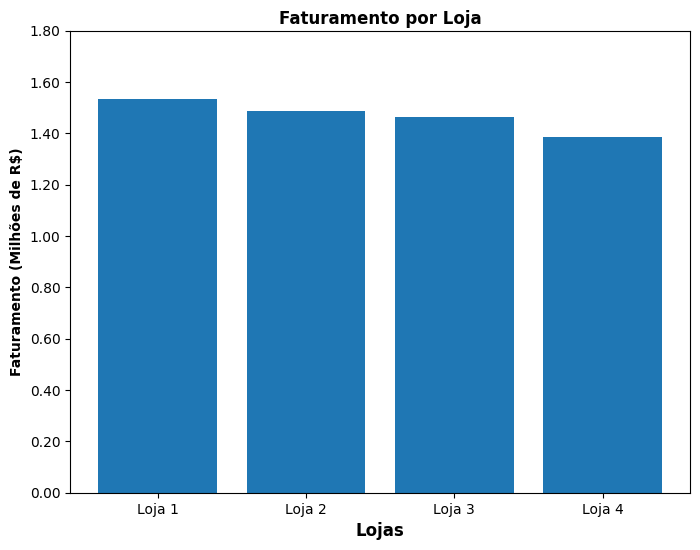

In [ ]:
plt.style.use('default')  # ou outro estilo que você preferir

# Criando uma lista para cada eixo do gráfico
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8,6)) # This line is added to create fig and ax

plt.bar(x=lojas, height=faturamentos) # lojas para o eixo x e faturamentos para o eixo y
plt.style.use('classic')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.2f}'.format(x/1000000)))
plt.xlabel("Lojas", fontsize=12, fontweight='bold') # Adicionando um rótulop para o eixo-x
plt.ylabel("Faturamento (Milhões de R$)", fontsize=10, fontweight='bold') # Adicionando um rótulo para o eixo-y
plt.title("Faturamento por Loja", fontsize=12, fontweight = 'bold') # Adicionando um título para o gráfico
plt.show() # Exibindo o gráfico

In [ ]:
import os
print(os.getcwd())
!ls /content/

/content
sample_data


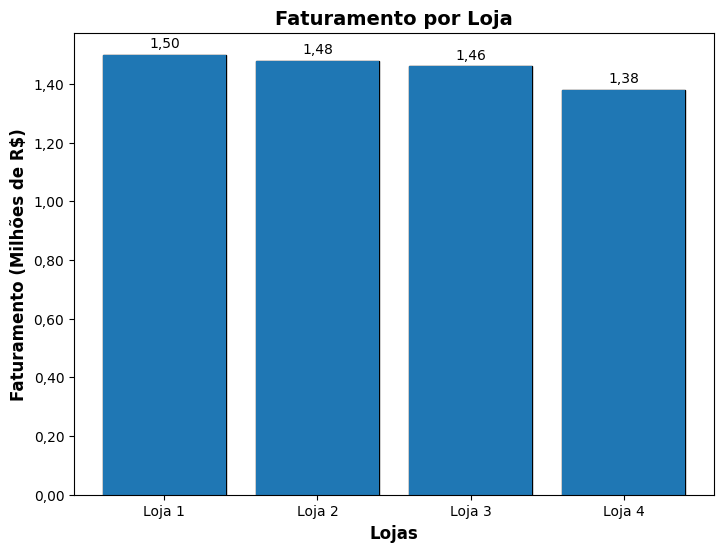

In [ ]:
#from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Mount Google Drive
#drive.mount('/content/drive')

# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

# Dados
faturamentos = [1500000, 1480000, 1460000, 1380000]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos_milhao = [f/1_000_000 for f in faturamentos]

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))  # Tamanho ajustável

# Barras
bars = ax.bar(x=lojas, height=faturamentos, color='royalblue', edgecolor='black')

# Formatar valores do eixo y com separador de milhar
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.')))


# Rótulos e título
ax.set_xlabel("Lojas", fontsize=12, fontweight='bold')
ax.set_ylabel("Faturamento (Milhões de R$)", fontsize=12, fontweight='bold')
ax.set_title("Faturamento por Loja", fontsize=14, fontweight='bold')

# Ajustar margens laterais
plt.subplots_adjust(left=0.15, right=0.95)

# Adicionar rótulos de valor acima de cada barra
bars = ax.bar(lojas, faturamentos)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height/1000000:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10)


# Salva o gráfico no Google Drive
#caminho_para_salvar = '/content/drive/MyDrive/Colab Notebooks/resultados/meu_grafico.png'
#plt.savefig(caminho_para_salvar)
#plt.close() # Importante fechar a figura para liberar memória

# Exibir o gráfico
plt.show()

# Grid horizontal leve para facilitar leitura
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # grid atrás das barras

plt.show()

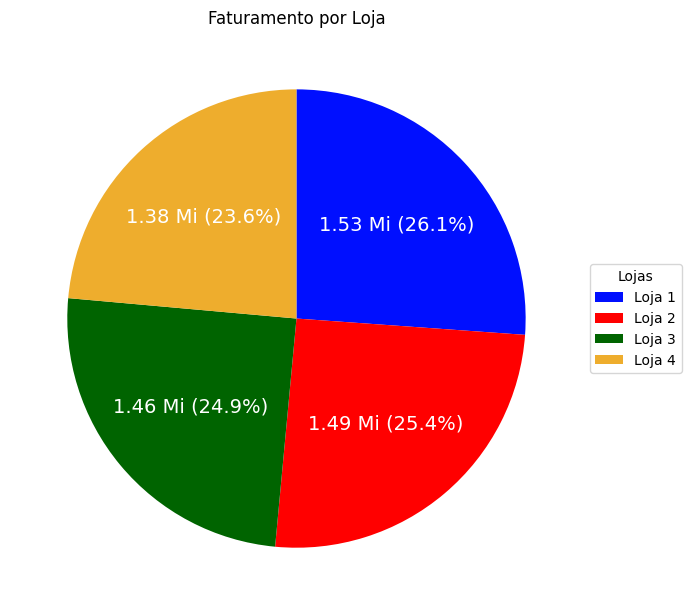

In [ ]:
import matplotlib.pyplot as plt

# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

# Lista com os faturamentos
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]

# Rótulos das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Cores personalizadas (se quiser usar próximas da imagem ou qualquer outra)
cores = ['#000FFF', '#FF0000', '#006400', '#EEAD2D']

# Função para exibir percentual e valor no autopct
def func_pct_valor(pct, allvals):
    valor = pct/100.*sum(allvals)
    valor_formatado = f'{valor/1e6:.2f} Mi'
    return f'{valor_formatado} ({pct:.1f}%)'


# Criando o gráfico de pizza
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    faturamentos,
    labels=None,                     # sem labels diretos nas fatias
    colors=cores,
    autopct=lambda pct: func_pct_valor(pct, faturamentos),
    startangle=90,
    counterclock=False
)

# Adicionando legenda
plt.legend(
    wedges, lojas, title='Lojas', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)
)

for text in texts:
    text.set_color('white')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# Título
plt.title('Faturamento por Loja')

# Exibindo gráfico
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria
##Categorias mais populares##


Sem ordem de vendas do menor para o maior. **Resultado não ordenando e apenas um loja.**

In [ ]:
import csv
import requests
from io import StringIO

# Baixar conteúdo da URL
resposta = requests.get(url1)
conteudo = resposta.text

# Converter o conteúdo para arquivo em memória
arquivo_csv = StringIO(conteudo)
leitor = csv.reader(arquivo_csv)

# Pular o cabeçalho
next(leitor)

# Criar o dicionário para somar vendas por categoria
faturamento_por_categoria = {}

# Ler linha por linha
for linha in leitor:
    categoria = linha[1]  # primeira coluna → Categoria do Produto
    preco = float(linha[2])  # segunda coluna → Preço

    if categoria in faturamento_por_categoria:
        faturamento_por_categoria[categoria] += preco
    else:
        faturamento_por_categoria[categoria] = preco

# Mostrar os totais por categoria
for categoria, total in faturamento_por_categoria.items():
    valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{categoria}: R$ {valor_formatado}')

eletronicos: R$ 572.659,23
moveis: R$ 250.178,11
brinquedos: R$ 23.993,78
eletrodomesticos: R$ 484.913,36
utilidades domesticas: R$ 16.931,48
esporte e lazer: R$ 52.387,55
livros: R$ 11.713,92
instrumentos musicais: R$ 121.731,69


Para que as categorias sejam apresentadas da maior venda para a menor acrescentei **a função sorted()**.
Para isso seria melhor trabalhar com tuplas ao invés de dicionário. Então a mudança foi na estruruta de repetição:

de:
```
for categoria, total in faturamento_por_categoria.items():
```
para:
```
faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)
for categoria, total in faturamento_ordenado:
```

In [ ]:
import csv
import requests
from io import StringIO

# Baixar conteúdo da URL
resposta = requests.get(url1)
conteudo = resposta.text

# Converter o conteúdo para arquivo em memória
arquivo_csv = StringIO(conteudo)
# lê linha por linha
leitor = csv.reader(arquivo_csv)

# Pular o cabeçalho
next(leitor)

# Criar o dicionário para somar vendas por categoria
faturamento_por_categoria = {}

# Ler linha por linha
for linha in leitor:
    categoria = linha[1]  # primeira coluna → Categoria do Produto
    preco = float(linha[2])  # segunda coluna → Preço

    if categoria in faturamento_por_categoria:
        faturamento_por_categoria[categoria] += preco
    else:
        faturamento_por_categoria[categoria] = preco

# Ordenar o dicionário do menor para o maior faturamento
faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)

# Mostrar os totais por categoria
for categoria, total in faturamento_ordenado:
    valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{categoria}: R$ {valor_formatado}')


eletronicos: R$ 572.659,23
eletrodomesticos: R$ 484.913,36
moveis: R$ 250.178,11
instrumentos musicais: R$ 121.731,69
esporte e lazer: R$ 52.387,55
brinquedos: R$ 23.993,78
utilidades domesticas: R$ 16.931,48
livros: R$ 11.713,92


#Por Loja#

In [ ]:
import csv
import requests
from io import StringIO

# Baixar conteúdo da URL
urls = [url1, url2, url3, url4]  # Define urls as a list

for i in range(4):
  resposta = requests.get(urls[i]) # Access urls using index i
  conteudo = resposta.text

  # Converter o conteúdo para arquivo em memória
  arquivo_csv = StringIO(conteudo)
  leitor = csv.reader(arquivo_csv)

  # Pular o cabeçalho
  next(leitor)

  # Criar o dicionário para somar vendas por loja e categoria
  faturamento_por_categoria = {}

  # Ler linha por linha
  for linha in leitor:
    categoria = linha[1]  # primeira coluna → Categoria do Produto
    preco = float(linha[2])  # segunda coluna → Preço

    if categoria in faturamento_por_categoria:
      faturamento_por_categoria[categoria] += preco
    else:
      faturamento_por_categoria[categoria] = preco

  # Ordenar o dicionário do menor para o maior faturamento
  faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)

  # Mostrar os totais por loja e categoria
  print('')
  print(f'Loja{i+1}') # por loja
  print('')
  for categoria, total in faturamento_ordenado:
    valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{categoria}: R$ {valor_formatado}')


Loja1

eletronicos: R$ 572.659,23
eletrodomesticos: R$ 484.913,36
moveis: R$ 250.178,11
instrumentos musicais: R$ 121.731,69
esporte e lazer: R$ 52.387,55
brinquedos: R$ 23.993,78
utilidades domesticas: R$ 16.931,48
livros: R$ 11.713,92

Loja2

eletronicos: R$ 547.773,71
eletrodomesticos: R$ 464.758,13
moveis: R$ 235.234,68
instrumentos musicais: R$ 139.987,03
esporte e lazer: R$ 46.326,09
brinquedos: R$ 21.262,21
utilidades domesticas: R$ 19.662,86
livros: R$ 13.454,35

Loja3

eletronicos: R$ 547.699,92
eletrodomesticos: R$ 438.984,89
moveis: R$ 268.095,56
instrumentos musicais: R$ 103.174,45
esporte e lazer: R$ 47.456,10
brinquedos: R$ 25.869,20
utilidades domesticas: R$ 20.080,21
livros: R$ 12.664,70

Loja4

eletronicos: R$ 545.966,86
eletrodomesticos: R$ 377.680,65
moveis: R$ 256.705,65
instrumentos musicais: R$ 100.136,50
esporte e lazer: R$ 44.465,65
brinquedos: R$ 27.015,67
utilidades domesticas: R$ 20.098,83
livros: R$ 12.427,77


#Criar gráfico de vendas por catergora e por loja#

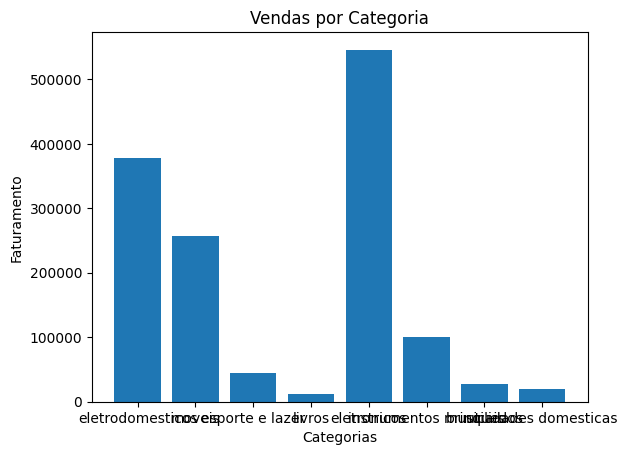

In [ ]:
# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

categorias = list(faturamento_por_categoria.keys())
valores = list(faturamento_por_categoria.values())

plt.bar(x=categorias, height=valores)
plt.xlabel("Categorias")
plt.ylabel("Faturamento")
plt.title("Vendas por Categoria")
plt.show()

Como o primeiro gráfico que fiz, do faturamento por loja, coincidiu de a sequencia loja1 até loja4 estar na ordem de faturamento do maior para o menor, então usei o mesmo código para as Categorias e para minha surpresa o gráfico não ficou apresentável. Além do que é apresentado o resultado de somente uma loja.

Abaixo uma solução para apresentar as colunas de categorias por ordem do maior para o menor e foi melhorado a apresentação das categorias no eixo-x e formatado os valores e rótulos para ficar mais apresentável

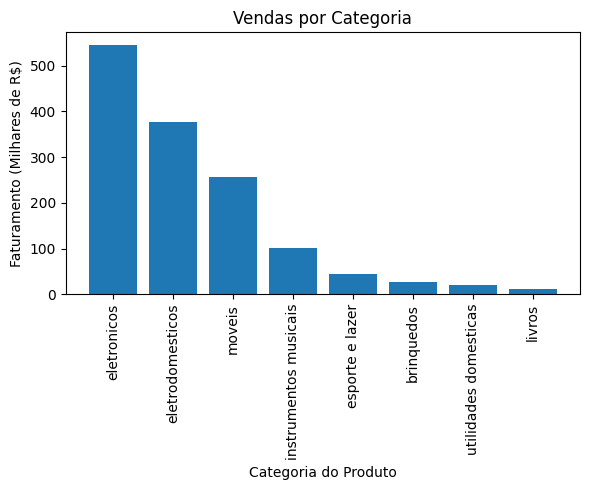

In [ ]:
# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

# Separar as categorias e os valores
categorias = [item[0] for item in faturamento_ordenado]
valores = [item[1] for item in faturamento_ordenado]

# Criar o gráfico
plt.figure(figsize=(6,5))
plt.bar(categorias, valores)

# Colocar as categorias na vertical (rotacionar o eixo X)
plt.xticks(rotation=90)

# Formatar o eixo Y para mostrar em milhares com separador de milhar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}'.replace(',', '.')))

# Título e labels
plt.title('Vendas por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (Milhares de R$)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


Também não gostei da apresentação do gráfico e nota-se que ficaria bem melhor se as categorias fossem para o eixo-y. Assim criei o gráfico com barras horizontais **(apenas Loja 4)**

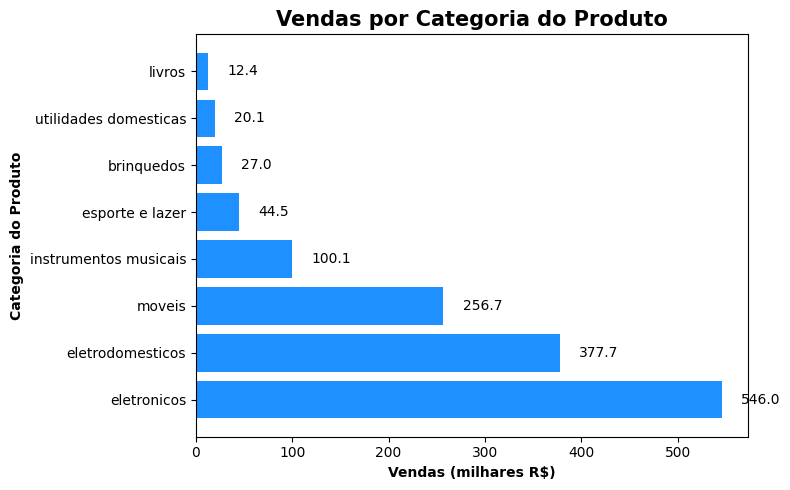

In [ ]:
# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

import matplotlib.pyplot as plt

categorias = [item[0] for item in faturamento_ordenado]
valores = [item[1] for item in faturamento_ordenado]

# Criar o gráfico de barras horizontais
plt.figure(figsize=(8,5))
bars = plt.barh(categorias, valores, color='dodgerblue')

# Adicionar os valores no final das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20000, bar.get_y() + bar.get_height()/2,
             f'{width/1_000:.1f}', va='center')

# Formatar o eixo X para mostrar valores em milhões com separador de milhar
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000:.0f}'))

# Título e labels
plt.title('Vendas por Categoria do Produto',fontsize=15, fontweight='bold')
plt.xlabel('Vendas (milhares R$)', fontsize=10, fontweight='bold')
plt.ylabel('Categoria do Produto', fontsize=10, fontweight='bold')

# Layout e exibição
plt.tight_layout()
plt.show()


Uma vez aprendido como fazer o gráfico om barras horizontais, agora fiz gráfico com **TODAS** as Lojas

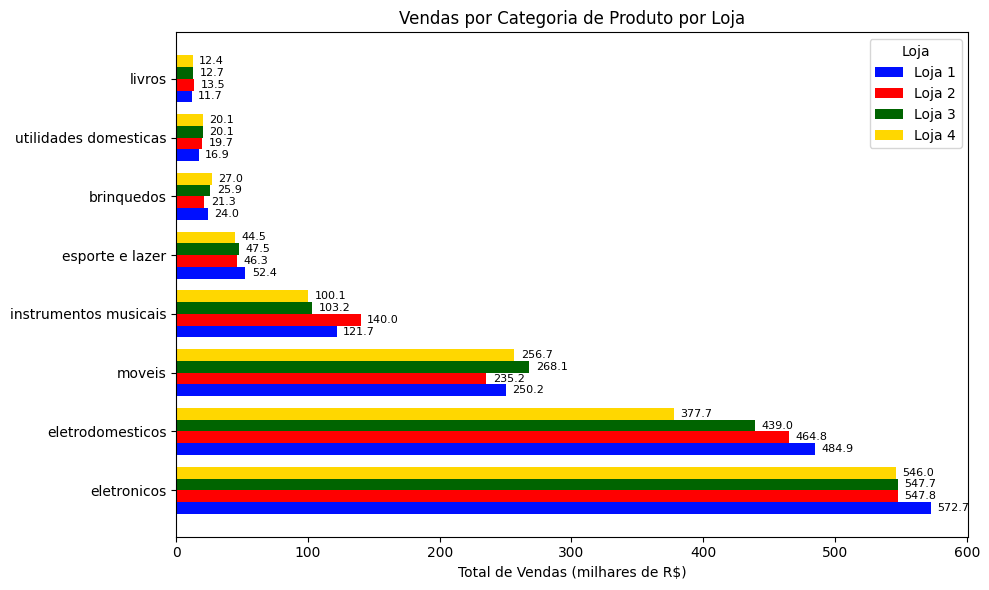

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

categorias = [item[0] for item in faturamento_ordenado]

faturamento_loja1 = loja1.groupby('Categoria do Produto')['Preço'].sum()
faturamento_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
faturamento_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
faturamento_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

faturamento_loja1 = faturamento_loja1.reindex(categorias, fill_value=0)
faturamento_loja2 = faturamento_loja2.reindex(categorias, fill_value=0)
faturamento_loja3 = faturamento_loja3.reindex(categorias, fill_value=0)
faturamento_loja4 = faturamento_loja4.reindex(categorias, fill_value=0)

# Valores para cada loja
loja_1 = faturamento_loja1.values
loja_2 = faturamento_loja2.values
loja_3 = faturamento_loja3.values
loja_4 = faturamento_loja4.values

# Agrupar os dados

valores = [loja_1, loja_2, loja_3, loja_4]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Configurar a posição das categorias
y = np.arange(len(categorias))
altura_barra = 0.2  # altura de cada barra
deslocamentos = [-1.5*altura_barra, -0.5*altura_barra, 0.5*altura_barra, 1.5*altura_barra]

# Criar o gráfico
plt.figure(figsize=(10,6))

cores = ['#000FFF', '#FF0000', '#006400', '#FFD700']

for i, (valores_loja, cor) in enumerate(zip(valores, cores)):
    plt.barh(y + deslocamentos[i], valores_loja, height=altura_barra, color=cor, label=f'Loja {i+1}')

    # Adicionar os valores no final das barras
    for xi, yi in zip(valores_loja, y + deslocamentos[i]):
        plt.text(xi + 5000, yi, f'{xi/1000:.1f}', va='center', fontsize=8)

# Configurações gerais
plt.yticks(y, categorias)
plt.xlabel('Total de Vendas (milhares de R$)')
plt.title('Vendas por Categoria de Produto por Loja')

# Formatar eixo X para Mi
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))

plt.legend(title='Loja')
plt.tight_layout()
plt.show()



Agora a avaliação por Loja abaixo **com resultados não ordenados:**

In [ ]:
import pandas as pd

# URLs dos CSVs (exemplo fictício — substitua pelas suas URLs reais)
url_loja1 = url1
url_loja2 = url2
url_loja3 = url3
url_loja4 = url4

# Lista de URLs e nomes de lojas
urls = [url_loja1, url_loja2, url_loja3, url_loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Dicionário para armazenar os faturamentos por loja
faturamentos_por_loja = {}

# Loop para processar cada loja
for i in range(4):
    # Lê o CSV da loja
    df = pd.read_csv(urls[i])

    # Agrupa por categoria e soma os preços
    faturamento_categoria = df.groupby('Categoria do Produto')['Preço'].sum().to_dict()

    # Adiciona no dicionário principal
    faturamentos_por_loja[nomes_lojas[i]] = faturamento_categoria

# Exibir resultados
for loja, categorias in faturamentos_por_loja.items():
    print(f'\n {loja}')
    for categoria, total in categorias.items():
        valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
        print(f'  {categoria}: R$ {valor_formatado}')



 Loja 1
  brinquedos: R$ 23.993,78
  eletrodomesticos: R$ 484.913,36
  eletronicos: R$ 572.659,23
  esporte e lazer: R$ 52.387,55
  instrumentos musicais: R$ 121.731,69
  livros: R$ 11.713,92
  moveis: R$ 250.178,11
  utilidades domesticas: R$ 16.931,48

 Loja 2
  brinquedos: R$ 21.262,21
  eletrodomesticos: R$ 464.758,13
  eletronicos: R$ 547.773,71
  esporte e lazer: R$ 46.326,09
  instrumentos musicais: R$ 139.987,03
  livros: R$ 13.454,35
  moveis: R$ 235.234,68
  utilidades domesticas: R$ 19.662,86

 Loja 3
  brinquedos: R$ 25.869,20
  eletrodomesticos: R$ 438.984,89
  eletronicos: R$ 547.699,92
  esporte e lazer: R$ 47.456,10
  instrumentos musicais: R$ 103.174,45
  livros: R$ 12.664,70
  moveis: R$ 268.095,56
  utilidades domesticas: R$ 20.080,21

 Loja 4
  brinquedos: R$ 27.015,67
  eletrodomesticos: R$ 377.680,65
  eletronicos: R$ 545.966,86
  esporte e lazer: R$ 44.465,65
  instrumentos musicais: R$ 100.136,50
  livros: R$ 12.427,77
  moveis: R$ 256.705,65
  utilidades domes

# 3. Média de Avaliação das Lojas

In [ ]:
import statistics

avaliacao1 = loja1['Avaliação da compra'].mean()
avaliacao2 = loja2['Avaliação da compra'].mean()
avaliacao3 = loja3['Avaliação da compra'].mean()
avaliacao4 = loja4['Avaliação da compra'].mean()

for i in range(4):
    # Corrected the variable name in f-string to match the iteration
    print(f'\nAvaliação da loja {i+1}: {[avaliacao1, avaliacao2, avaliacao3, avaliacao4][i]:.2f}')


Avaliação da loja 1: 3.98

Avaliação da loja 2: 4.04

Avaliação da loja 3: 4.05

Avaliação da loja 4: 4.00


##Avaliando graficamente as avaliaçõs de cada loja##

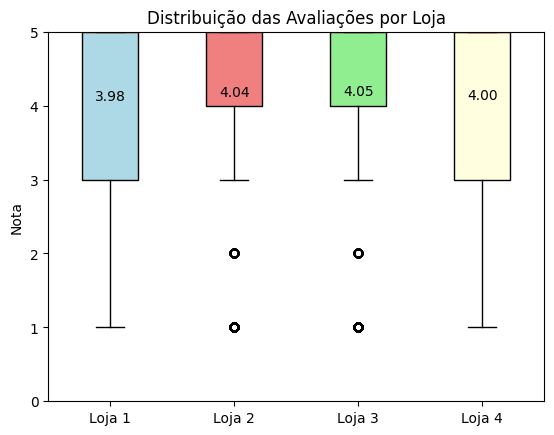

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

notas_loja1 = loja1['Avaliação da compra'].values
notas_loja2 = loja2['Avaliação da compra'].values
notas_loja3 = loja3['Avaliação da compra'].values
notas_loja4 = loja4['Avaliação da compra'].values

# Define colors for each box
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']

# Create the boxplot with colors
bp = plt.boxplot([notas_loja1, notas_loja2, notas_loja3, notas_loja4],
                 tick_labels=lojas, patch_artist=True)

# Customize box colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add average values as text on the plot
for i, notas in enumerate([notas_loja1, notas_loja2, notas_loja3, notas_loja4]):
    avg = np.mean(notas)
    plt.text(i + 1, avg + 0.05, f'{avg:.2f}', ha='center', va='bottom')

plt.ylim(0, 5)
plt.title('Distribuição das Avaliações por Loja')
plt.ylabel('Nota')
plt.show()

# 4. Produtos Mais e Menos Vendidos

```python
# Ordenar o dicionário do menor para o maior faturamento
faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)
```

In [ ]:
import pandas as pd

# URLs dos CSVs
url_loja1 = url1
url_loja2 = url2
url_loja3 = url3
url_loja4 = url4

# Lista de URLs e nomes de lojas
urls = [url_loja1, url_loja2, url_loja3, url_loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Dicionário para armazenar os faturamentos por loja
faturamentos_por_loja = {}

# Loop para processar cada loja
for i in range(4):
    # Lê o CSV da loja
    df = pd.read_csv(urls[i])

    # Agrupa por produto e soma os preços
    faturamento_produto = df.groupby('Produto')['Preço'].sum().to_dict()

    # Adiciona no dicionário principal
    faturamentos_por_loja[nomes_lojas[i]] = faturamento_produto

# Exibir resultados
for loja, produtos in faturamentos_por_loja.items():
    print(f'\n* {loja}')

    produtos_ordenados = sorted(produtos.items(), key=lambda item: item[1], reverse=True)

    for produto, total in produtos_ordenados:
        valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
        print(f'  {produto}: R$ {valor_formatado}')


* Loja 1
  TV Led UHD 4K: R$ 189.534,28
  Geladeira: R$ 149.524,28
  Celular Plus X42: R$ 130.536,40
  Smart TV: R$ 89.936,15
  Lavadora de roupas: R$ 87.711,30
  Lava louças: R$ 82.739,86
  Secadora de roupas: R$ 78.749,73
  Tablet ABXY: R$ 63.520,11
  Bateria: R$ 50.258,34
  Guitarra: R$ 49.722,88
  Micro-ondas: R$ 46.348,89
  Celular ABXY: R$ 43.534,47
  Sofá retrátil: R$ 41.839,25
  Cama king: R$ 41.569,04
  Fogão: R$ 39.839,30
  Guarda roupas: R$ 39.282,78
  Bicicleta: R$ 36.592,38
  Cama box: R$ 29.459,35
  Cadeira de escritório: R$ 23.556,36
  Impressora: R$ 21.884,23
  Cômoda: R$ 20.905,92
  Violão: R$ 18.765,28
  Kit banquetas: R$ 16.188,25
  Mesa de jantar: R$ 14.042,39
  Poltrona: R$ 13.172,23
  Assistente virtual: R$ 10.744,05
  Mesa de centro: R$ 10.162,54
  Jogo de tabuleiro: R$ 10.152,50
  Smartwatch: R$ 9.936,51
  Jogo de panelas: R$ 8.410,44
  Fone de ouvido: R$ 6.725,32
  Headset: R$ 6.307,71
  Mochila: R$ 5.156,50
  Carrinho controle remoto: R$ 5.015,28
  Modelagem 

No código acima os produtos estão ordenados pelos mais vendidos. Agora vamos aplicar **a regra 80/20**, em que 80% do faturamento vem de 20% dos produtos.

In [ ]:
for loja, produtos in faturamentos_por_loja.items():
    print(f'\n {loja}')

    # ordena os produtos pelo total faturado (do maior para o menor)
    produtos_ordenados = sorted(produtos.items(), key=lambda item: item[1], reverse=True)

    # calcula o faturamento total da loja
    faturamento_total = sum(produtos.values())
    meta_80 = faturamento_total * 0.8

    acumulado = 0
    produtos_80_20 = []

    for produto, total in produtos_ordenados:
        acumulado += total
        produtos_80_20.append((produto, total))
        if acumulado >= meta_80:
            break

    # Exibir produtos que representam 80% do faturamento
    print('Produtos que representam 80% do faturamento:')
    for produto, total in produtos_80_20:
        valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
        print(f'  {produto}: R$ {valor_formatado}')

    print(f'Faturamento total da loja: R$ {format(faturamento_total, ",.2f").replace(",", "X").replace(".", ",").replace("X", ".")}')


 Loja 1
Produtos que representam 80% do faturamento:
  TV Led UHD 4K: R$ 189.534,28
  Geladeira: R$ 149.524,28
  Celular Plus X42: R$ 130.536,40
  Smart TV: R$ 89.936,15
  Lavadora de roupas: R$ 87.711,30
  Lava louças: R$ 82.739,86
  Secadora de roupas: R$ 78.749,73
  Tablet ABXY: R$ 63.520,11
  Bateria: R$ 50.258,34
  Guitarra: R$ 49.722,88
  Micro-ondas: R$ 46.348,89
  Celular ABXY: R$ 43.534,47
  Sofá retrátil: R$ 41.839,25
  Cama king: R$ 41.569,04
  Fogão: R$ 39.839,30
  Guarda roupas: R$ 39.282,78
  Bicicleta: R$ 36.592,38
Faturamento total da loja: R$ 1.534.509,12

 Loja 2
Produtos que representam 80% do faturamento:
  Celular Plus X42: R$ 150.967,83
  TV Led UHD 4K: R$ 137.833,06
  Geladeira: R$ 130.176,48
  Lavadora de roupas: R$ 89.016,81
  Smart TV: R$ 81.522,94
  Secadora de roupas: R$ 78.820,31
  Lava louças: R$ 78.357,00
  Tablet ABXY: R$ 74.945,97
  Bateria: R$ 61.566,87
  Celular ABXY: R$ 55.558,43
  Guitarra: R$ 48.589,03
  Micro-ondas: R$ 48.256,37
  Fogão: R$ 40.13

**E para finalizar os 5 mais vendidos e os 5 menos vendidos em todas as lojas**

In [ ]:
# Conjuntos para armazenar os top 5 e bottom 5 de cada loja
top_5_por_loja = []
bottom_5_por_loja = []

for loja, produtos in faturamentos_por_loja.items():
    # ordena os produtos pelo total faturado (do maior para o menor)
    produtos_ordenados = sorted(produtos.items(), key=lambda item: item[1], reverse=True)

    # Pegar os 5 mais vendidos e os 5 menos vendidos (pegar só o nome do produto)
    top_5 = set([produto for produto, total in produtos_ordenados[:5]])
    bottom_5 = set([produto for produto, total in produtos_ordenados[-5:]])

    # Adicionar ao conjunto geral
    top_5_por_loja.append(top_5)
    bottom_5_por_loja.append(bottom_5)

# Encontrar os comuns às quatro lojas (interseção dos conjuntos)
comuns_top_5 = set.intersection(*top_5_por_loja)
comuns_bottom_5 = set.intersection(*bottom_5_por_loja)

# Exibir resultados
print('\n# Produtos comuns no TOP 5 de todas as lojas:')
if comuns_top_5:
    for produto in comuns_top_5:
        print(f'  {produto}')
else:
    print('  Nenhum produto em comum.')

print('\n# Produtos comuns nos 5 MENOS vendidos de todas as lojas:')
if comuns_bottom_5:
    for produto in comuns_bottom_5:
        print(f'  {produto}')
else:
    print('  Nenhum produto em comum.')


# Produtos comuns no TOP 5 de todas as lojas:
  Smart TV
  TV Led UHD 4K
  Celular Plus X42
  Geladeira

# Produtos comuns nos 5 MENOS vendidos de todas as lojas:
  Corda de pular
  Dinossauro Rex
  Cubo mágico 8x8
  Jogo de copos


# 5. Frete Médio por Loja


In [ ]:
frete = {
    "Loja 01": loja1['Frete'].sum(),
    "Loja 02": loja2['Frete'].sum(),
    "Loja 03": loja3['Frete'].sum(),
    "Loja 04": loja4['Frete'].sum()
}

print("\nFRETE\n")
for nome_loja, valor_frete in frete.items():

  print(f"Valor total do frete {nome_loja}:")
  print(f"R${valor_frete:,.2f}\n".replace(",", "X").replace(".", ",").replace("X", "."))

#MEDIA DE FRETE POR LOJA
media_frete = {
    "Loja 01": loja1['Frete'].mean(),
    "Loja 02": loja2['Frete'].mean(),
    "Loja 03": loja3['Frete'].mean(),
    "Loja 04": loja4['Frete'].mean()
}

for nome_loja, mediafrete in media_frete.items():
  print(f"O valor médio do frete da {nome_loja}")
  print(f"R${mediafrete:.2f}\n".replace(",", "X").replace(".", ",").replace("X", "."))


FRETE

Valor total do frete Loja 01:
R$81.837,97

Valor total do frete Loja 02:
R$79.314,16

Valor total do frete Loja 03:
R$78.022,66

Valor total do frete Loja 04:
R$73.755,88

O valor médio do frete da Loja 01
R$34,69

O valor médio do frete da Loja 02
R$33,62

O valor médio do frete da Loja 03
R$33,07

O valor médio do frete da Loja 04
R$31,28



#6. Relatório

Das quatro lojas do Sr João, que pertencem ao e-commerce Alura Store, há pouca diferença de faturmento entre elas. O faturamento de cada uma delas é:


+ Loja 1: R$ 1.534.509,12

+ Loja 2: R$ 1.488.459,06

+ Loja 3: R$ 1.464.025,03

+ Loja 4: R$ 1.384.497,58


O gráfico de barras a seguir mostra que a maior diferença entre elas é da Loja 1 par a Loja 4, **uma diferença que não chega a 10%.**  

+ Loja com maior faturamento: Loja 1 (R$ 1.534.509,12)

+ Diferença da Loja 2 para a Loja 1: R$ 46.050,06 (3,0%)

+ Diferença da Loja 3 para a Loja 1: R$ 70.484,09 (4,6%)

+ Diferença da Loja 4 para a Loja 1: R$ 150.011,54 (9,8%)


Do ponto de vista das Avaliações todas as 4 Lojas são muito bem avaliadas:

+ Avaliação da loja 1: 3.98

+ Avaliação da loja 2: 4.04

+ Avaliação da loja 3: 4.05

+ Avaliação da loja 4: 4.00

E quanto aos Produtos Mais e Menos vendidos não há nenhuma discrepância, todas mantendo as mesmas Categorias:

+ Mais vendidos
    * eletrônicos
    * eletrodomésticos
    * móveis
+ Menos vendidps
    * brinquedos
    * utilidades domésticas
    * livros

**Sendo que eletrônicos, eletrodomésticos e móveis correspondem a cerca de 80% das vendas.**

Outro dado importante é o Frete Médio que como podemos ver pela anáise dos dados não demonstrou quase nenhuma variação:

+ O valor médio do frete:
    * Loja 01: R$ 34,69
    * Loja 02: R$ 33,62
    * Loja 03: R$ 33,07
    * Loja 04: R$ 31,28

Se um das lojas apresentasse um valor muito discrepante com relação ao Frete Médio isso poderia indicar um posicionamento logístico desvatajoso em relação às demais, mas não é isso que observamos.

Com base em todas essas análises, vemos que o Sr João tem 4 bons negócios o que valoriza a sua decisão de vender uma das lojas para investir em um novo negócio. Isso porque se uma das Lojas tivesse um desempenho muito discrepante com relação às demais, isso desvalorizaria essa loja e a tornaria menos atraente para um potencial comprador. Logo ele pode usar o faturamento da Loja 1 como um atrativo para vender a Loja 4.

Os dados não permitem uma avaliação mais precisa como margem de lucro, taxa de crescimento, posicionamento de mercado e nicho, base de clientes, tráfego do e-commerce e taxas de conversão entre outras.

Assim o natural seria vender a Loja 4 pois em termos absolutos ela é a de menor faturamento. Mas em comparação com o desempenho das outras isso a valoriza como um bom negócio para o potencial comprador que pode aplicar seu gerenciamento do negócio para obter pelo menos um faturamento extra de R$ 150.000,00 por ano igualando-se à Loja1.

**O sr joao deve vender a Loja 4**

📌 **Conclusão**

O Sr. João tem 4 bons negócios. Como nenhuma loja apresenta desempenho discrepante, o faturamento da Loja 1 pode ser usado como referência para valorizar a venda da Loja 4.

Apesar de menor faturamento, a Loja 4 se mostra atrativa, podendo o comprador, com boa gestão, **obter pelo menos R$ 150.000,00 extras por ano**, nivelando-a com a Loja 1.

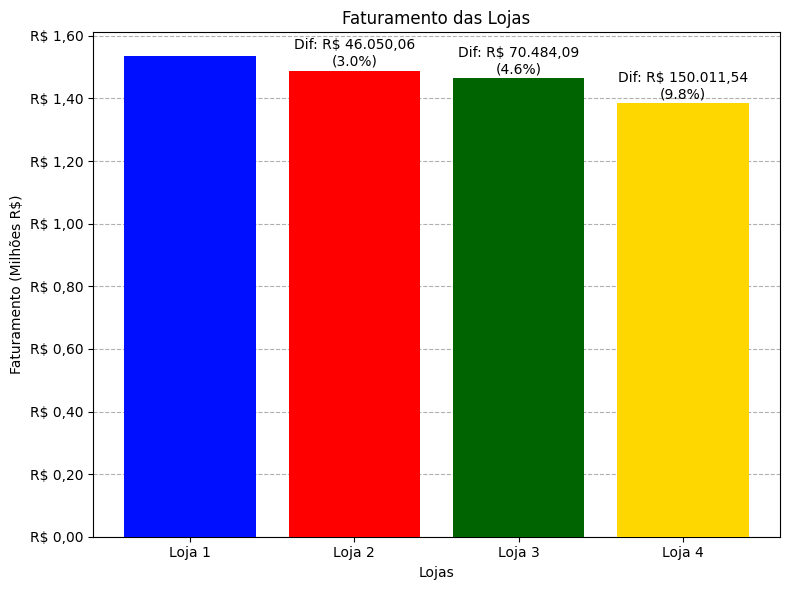

Loja com maior faturamento: Loja 1 (R$ 1.534.509,12)
Diferença da Loja 2 para a Loja 1: R$ 46.050,06 (3.0%)
Diferença da Loja 3 para a Loja 1: R$ 70.484,09 (4.6%)
Diferença da Loja 4 para a Loja 1: R$ 150.011,54 (9.8%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

maior_faturamento = max(faturamentos)
loja_maior = lojas[faturamentos.index(maior_faturamento)]

diferencas_abs = [maior_faturamento - fat for fat in faturamentos]
diferencas_perc = [(diff / maior_faturamento) * 100 for diff in diferencas_abs]

plt.figure(figsize=(8, 6)) # largura para melhor visualização das anotações

# Adiciona a grade no eixo y e coloca atrás das barras
plt.grid(axis='y', linestyle='--', zorder=-1) # zorder=0 coloca a grade atrás

# Desenha as barras primeiro
bars = plt.bar(lojas, faturamentos, color=['#000FFF', '#FF0000', '#006400', '#FFD700'], zorder=3)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (Milhões R$)")
plt.title("Faturamento das Lojas")

# Função para formatar como moeda no eixo-y
def format_br_currency(value):
    return f'R$ {value/1_000_000:,.2f}'.replace(',', '#temp#').replace('.', ',').replace('#temp#', '.')

# Função para formatar como moeda nos rótulos e texto
def format_br_currency1(value):
    return f'R$ {value:,.2f}'.replace(',', '#temp#').replace('.', ',').replace('#temp#', '.')

# Adicionando anotações com a diferença formatada
for i, loja in enumerate(lojas):
    if loja != loja_maior:
        diff_abs = diferencas_abs[i]
        diff_perc = diferencas_perc[i]
        y_position = faturamentos[i] + 7000 # Ajustei um pouco a posição vertical
        plt.text(i, y_position, f'Dif: {format_br_currency1(diff_abs)}\n({diff_perc:.1f}%)', ha='center', va='bottom')

# Formatando o eixo y para moeda brasileira
def format_y_ticks(value, pos):
    return format_br_currency(value)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_ticks))

plt.tight_layout() # Ajusta o layout para evitar cortes nas anotações
plt.show()

print(f"Loja com maior faturamento: {loja_maior} ({format_br_currency1(maior_faturamento)})")
for i, loja in enumerate(lojas):
    if loja != loja_maior:
        print(f"Diferença da {loja} para a {loja_maior}: {format_br_currency1(diferencas_abs[i])} ({diferencas_perc[i]:.1f}%)")